In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("finalized_players.csv")
player_names = df['Player Name']
player_positions = df['Pos']
df = df.drop(columns=['Player Name'])  # 'Player Name' is just an identifier

# Handle categorical variables using one-hot encoding
categorical_cols = ['Pos', 'Squad', 'League', 'Season']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle missing values (fill with median values)
df = df.fillna(df.median())

# Filtering out columns we don't want to train off of
df = df.drop(df.filter(like="Squad").columns, axis=1)
df = df.drop(df.filter(like="League").columns, axis=1)
df = df.drop(df.filter(like="Season").columns, axis=1)

# Define features and target
X = df.drop(columns=['Rating'])  # Features
y = df['Rating']  # Target variable
print(X)

# Split the dataset into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Mean Absolute Error: {val_mae:.2f}")
print(f"Validation R² Score: {val_r2:.2f}")
print(f"Test Mean Absolute Error: {test_mae:.2f}")
print(f"Test R² Score: {test_r2:.2f}")

       90s  Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  Chl-Tkl  Att  Tkl%  \
0     13.7   29    19       20        7        2       20   34  58.8   
1     30.9   64    35       36       23        5       26   45  57.8   
2     16.9   21    14        8       10        3        8   18  44.4   
3     31.8   85    52       43       34        8       38   96  39.6   
4     15.6   25    19       15        9        1       17   34  50.0   
...    ...  ...   ...      ...      ...      ...      ...  ...   ...   
3647  15.7   21    15        9        7        5       11   19  57.9   
3648  23.1   11     6        8        3        0        4    7  57.1   
3649  18.3   20    10       12        8        0       12   18  66.7   
3650  28.8   52    25       19       30        3       22   44  50.0   
3651  25.6   58    33       24       21       13       29   68  42.6   

      Chl-Lost  ...  Crs  PKcon  OG  Recov  Won  Lost  Won%  Pos_DF,MF  \
0           14  ...   13      1   0     75    5    11  31.3  

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("finalized_players.csv")
df = df.drop(columns=['Player Name'])  # 'Player Name' is just an identifier


# Assign feature weights


#feature_weights = {
#    'Won%': 25, 'Tkl%': 2, 'Def 3rd': 2, 'Int': 2, 'Sh': 2, 'Pass': 2,
#    'Err': 0.5, 'Lost': 0.5,
#    'Tkl': 1.5, 'Clr': 1.5, 'Mid 3rd': 1.5, 'Att': 1.5, 'Blocks': 1.5,
#    'Att 3rd': 1.2, '90s': 1.2, 'Tkl+Int': 1.2, 'Tkl': 1.2
#}

# Apply feature weighting
#for col, weight in feature_weights.items():
#    if col in df.columns:
#        df[col] *= weight


categorical_cols = ['Pos', 'Squad', 'League', 'Season']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle missing values (fill with median values)
df = df.fillna(df.median())

X = df.drop(columns=['Rating'])
y = df['Rating']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
best_r2 = 0
for i in np.arange(0, 0.2, 0.1):
    for j in np.arange(0.7, 1, 0.1):
        xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, reg_alpha = i, reg_lambda = j, random_state=42)
        xgb_model.fit(X_train, y_train)

        y_pred = xgb_model.predict(X_test)
        if r2_score(y_test, y_pred) > best_r2:
            best_r2 = r2_score(y_test, y_pred)
print("Best R² Score:", best_r2)

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
#print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Train XGBoost with feature weights
#xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, importance_type='weight', random_state=42)
#xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, reg_alpha = 0, reg_lambda = 0, importance_type='weight', random_state=42)
#xgb_model.fit(X_train, y_train)
#xgb_model.fit(X_train, y_train, feature_weights=list(feature_weights.values()))

# Evaluate
#y_pred = xgb_model.predict(X_test)
#print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
#print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs. Actual Ratings (XGBoost)")
plt.show()

Number of Outliers (STD method): 26
Number of Outliers (IQR method): 13


<Axes: title={'center': 'Final Predicted vs. Actual Ratings (XGB with Outliers Highlighted)'}, xlabel='Actual Ratings', ylabel='Predicted Ratings'>

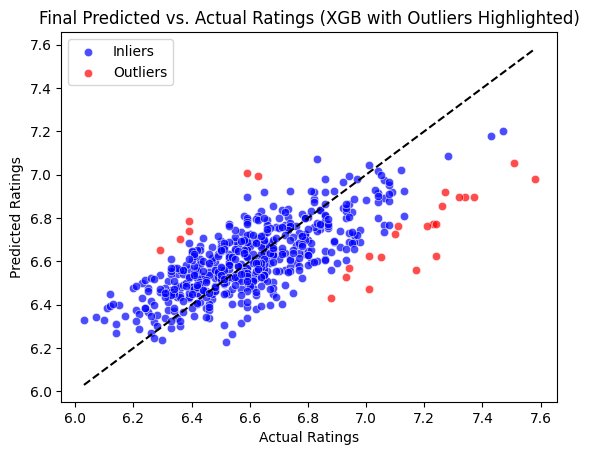

In [13]:
# Compute residuals (errors)
residuals = y_test - y_pred

# Method 1: Using Standard Deviation
std_dev = np.std(residuals)
mean_residual = np.mean(residuals)
threshold = 2 * std_dev  # Set threshold (e.g., 2 standard deviations)

outliers_std = np.sum(np.abs(residuals - mean_residual) > threshold)

print(f"Number of Outliers (STD method): {outliers_std}")

# Method 2: Using Interquartile Range (IQR)
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = np.sum((residuals < lower_bound) | (residuals > upper_bound))

print(f"Number of Outliers (IQR method): {outliers_iqr}")

# Identify outliers
outliers_mask = np.abs(residuals - mean_residual) > threshold

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Final Predicted vs. Actual Ratings (XGB with Outliers Highlighted)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  # Perfect fit line

# Plot normal points (blue)
sns.scatterplot(x=y_test[~outliers_mask], y=y_pred[~outliers_mask], alpha=0.7, color='blue', label="Inliers")

# Plot outliers (red)
sns.scatterplot(x=y_test[outliers_mask], y=y_pred[outliers_mask], alpha=0.7, color='red', label="Outliers")

In [14]:
# Calculate residuals
residuals = y_test - y_pred
std_dev = np.std(residuals)
mean_residual = np.mean(residuals)
threshold = 2 * std_dev

# Identify outliers
outliers_mask = np.abs(residuals - mean_residual) > threshold

# Retrieve player names corresponding to outliers
outlier_players = player_names.iloc[y_test.index[outliers_mask]]
outlier_positions = player_positions.iloc[y_test.index[outliers_mask]]

# Print outlier player names and their positions
outlier_data = pd.DataFrame({'Player': outlier_players, 'Position': outlier_positions})
print("Outlier Players and Their Positions:")
print(outlier_data)
print(len(outlier_data[outlier_positions == 'DF']))

Outlier Players and Their Positions:
                      Player Position
2543       Rodrigo Bentancur       MF
2550        Jason Berthomier       MF
2115           Ethan Pinnock       DF
423          Bruno Guimarães       MF
2464  Trent Alexander-Arnold       DF
862             Andy Pelmard       DF
2664       Sébastien Corchia       DF
3646     Oleksandr Zinchenko       DF
3315      Lorenzo Pellegrini       MF
1650        Ryan Gravenberch       MF
1029          Josip Stanišić       DF
1128                 Vitinha       MF
2149            Tomás Rincón       MF
411            Álex Grimaldo       DF
3524     Aurélien Tchouaméni       MF
3407        Fabián Ruiz Peña       MF
2259              Borna Sosa       DF
2886          İlkay Gündoğan       MF
816                Dani Olmo       MF
1114   José Luis García Vayá       MF
1662       Raphaël Guerreiro    DF,MF
859       Lorenzo Pellegrini       MF
2620                Casemiro       MF
1993              Yerry Mina       DF
2186         

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save to CSV
df.to_csv('grad boosting comp.csv', index=False)